In [213]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Clients

In [214]:
df_client = pd.read_csv('data/clients.csv', sep=';')
df_client.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [215]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [216]:
df_client.describe()

,birth
count,8623.000000
mean,1977.816769
std,46.071018
min,-2001.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [217]:
df_client.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [218]:
df_client.drop_duplicates(subset='client_id', keep='first', inplace=True)

In [219]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 269.5+ KB


Histogramme avant nettoyage


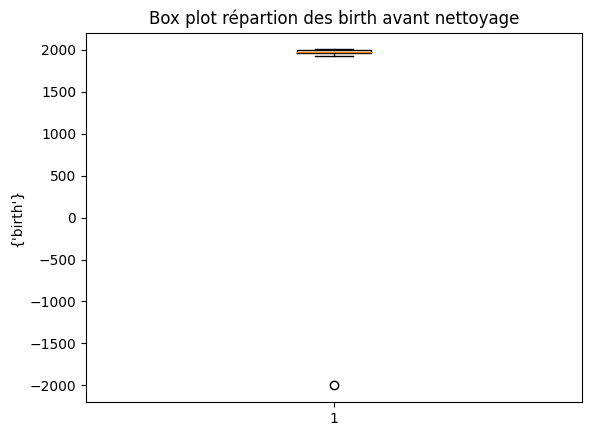

Les anomalies :
     client_id sex  birth  anomaly_if
8494      ct_1   m  -2001          -1
Histogramme après nettoyage


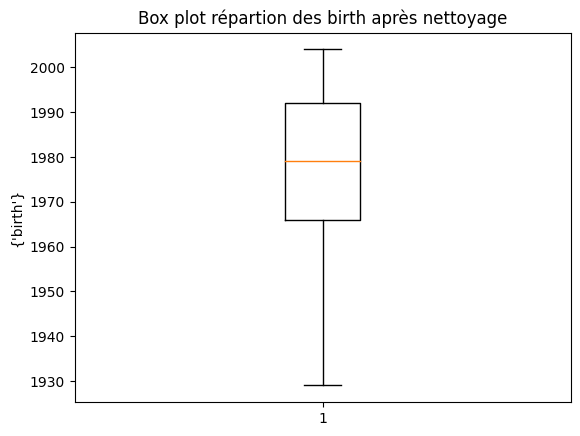

In [220]:
print('='*50)
print('Histogramme avant nettoyage')
plt.boxplot(df_client['birth'])

plt.title(f"Box plot répartion des {'birth'} avant nettoyage")
plt.ylabel("{'birth'}")

plt.show()


# Isolation Forest
clf = IsolationForest(contamination=0.0001, random_state=42)
clf.fit(df_client[['birth']])

df_client['anomaly_if'] = clf.predict(df_client[['birth']])
print('='*50)
print("Les anomalies :")
print(df_client[df_client['anomaly_if'] == -1])

# Supprimer les anomalies
df_client = df_client[df_client['anomaly_if'] != -1]

# histogramme après nettoyage
print('='*50)
print('Histogramme après nettoyage')
plt.boxplot(df_client['birth'])

plt.title(f"Box plot répartion des {'birth'} après nettoyage")
plt.ylabel("{'birth'}")

plt.show()

In [221]:
df_client.drop(columns='anomaly_if', inplace=True)

# Produits

In [222]:
df_produit = pd.read_csv('data/produits_sous-categorie.csv', sep=',')
df_produit.head()

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81


In [223]:
df_produit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 128.5+ KB


In [224]:
df_produit.drop_duplicates(subset='product_id', keep='first', inplace=True)

In [225]:
df_produit.isnull().sum()

product_id        0
category          0
sub_category      0
price             0
stock_quantity    0
dtype: int64

In [226]:
df_produit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3287 entries, 0 to 3286
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      3287 non-null   object 
 1   category        3287 non-null   object 
 2   sub_category    3287 non-null   object 
 3   price           3287 non-null   float64
 4   stock_quantity  3287 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 154.1+ KB


Histogramme avant nettoyage


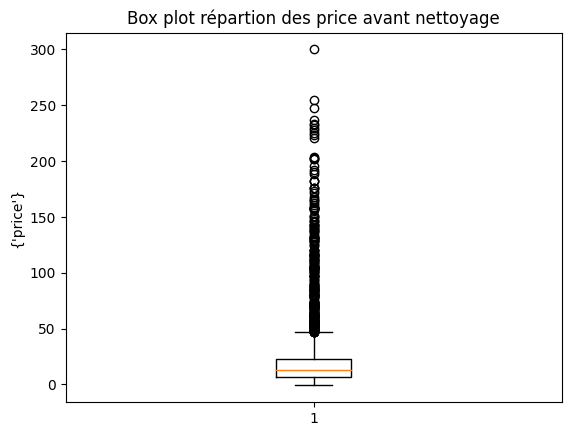

Les anomalies :
    product_id category        sub_category  price  stock_quantity  anomaly_if
947        2_2  Montres  Montres connectées  300.0              79          -1
Histogramme après nettoyage


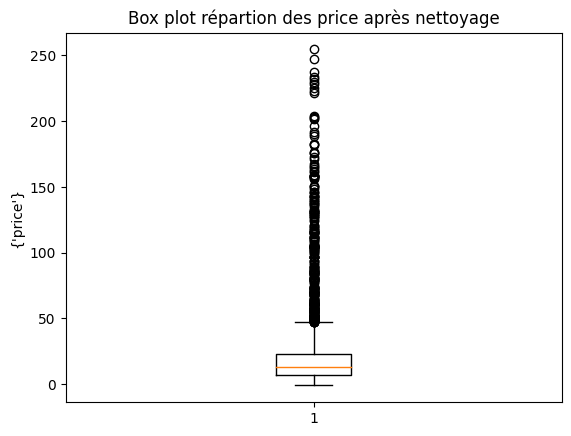

In [227]:
print('='*50)
print('Histogramme avant nettoyage')
plt.boxplot(df_produit['price'])

plt.title(f"Box plot répartion des {'price'} avant nettoyage")
plt.ylabel("{'price'}")

plt.show()


# Isolation Forest
clf = IsolationForest(contamination=0.0001, random_state=42)
clf.fit(df_produit[['price']])

df_produit['anomaly_if'] = clf.predict(df_produit[['price']])
print('='*50)
print("Les anomalies :")
print(df_produit[df_produit['anomaly_if'] == -1])

# Supprimer les anomalies
df_produit_sans = df_produit[df_produit['anomaly_if'] != -1]

# histogramme après nettoyage
print('='*50)
print('Histogramme après nettoyage')
plt.boxplot(df_produit_sans['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

On peut voir une grande dispersion dans les prix des objets mais pas énormement de valeur aberrantes. Nous allons nous interresser à chaque valeur de catégories. 

In [228]:
df_produit_montre = df_produit[df_produit["category"] == "Montres"]
df_produit_vetement = df_produit[df_produit["category"] == "Vêtements"]
df_produit_accessoire = df_produit[df_produit["category"] == "Accessoires"]

### Category = montres

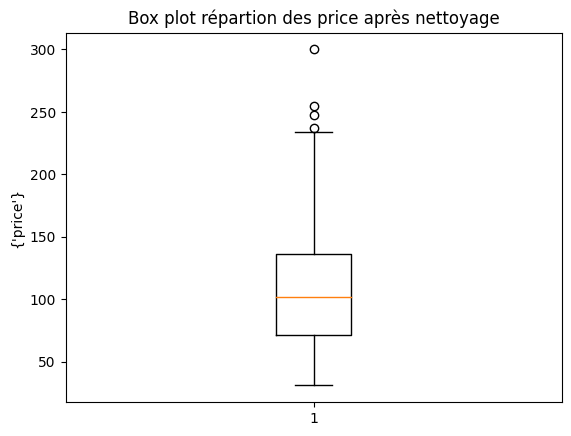

In [229]:
plt.boxplot(df_produit_montre['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

In [230]:
# Isolation Forest
clf = IsolationForest(contamination=0.001, random_state=42)
clf.fit(df_produit_montre[['price']])

df_produit_montre['anomaly_if'] = clf.predict(df_produit_montre[['price']])
print('='*50)
print("Les anomalies :")
print(df_produit_montre[df_produit_montre['anomaly_if'] == -1])

Les anomalies :
    product_id category        sub_category  price  stock_quantity  anomaly_if
947        2_2  Montres  Montres connectées  300.0              79          -1


/tmp/ipykernel_46621/4027236614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produit_montre['anomaly_if'] = clf.predict(df_produit_montre[['price']])


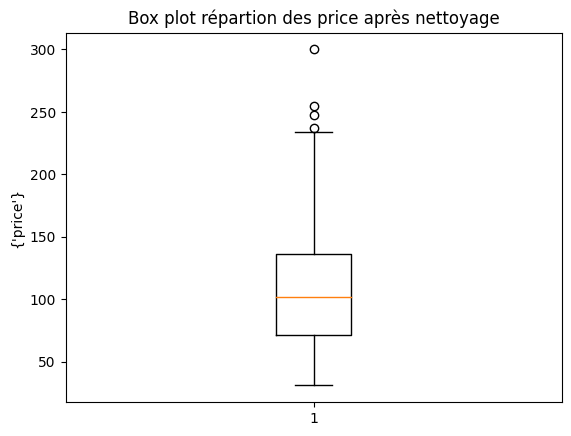

In [231]:
plt.boxplot(df_produit_montre['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

### Category = Vêtements

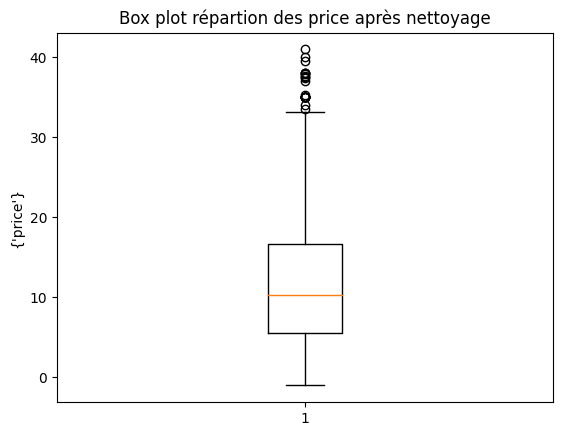

In [232]:
plt.boxplot(df_produit_vetement['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

In [233]:
# Isolation Forest
clf = IsolationForest(contamination=0.001, random_state=42)
clf.fit(df_produit_vetement[['price']])

df_produit_vetement['anomaly_if'] = clf.predict(df_produit_vetement[['price']])
print('='*50)
print("Les anomalies :")
print(df_produit_vetement[df_produit_vetement['anomaly_if'] == -1])

Les anomalies :
     product_id   category sub_category  price  stock_quantity  anomaly_if
47       0_1629  Vêtements     T-shirts  40.99              91          -1
1360      0_494  Vêtements     T-shirts  39.58              13          -1
2809     0_2147  Vêtements     T-shirts  39.99              99          -1


/tmp/ipykernel_46621/334381810.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produit_vetement['anomaly_if'] = clf.predict(df_produit_vetement[['price']])


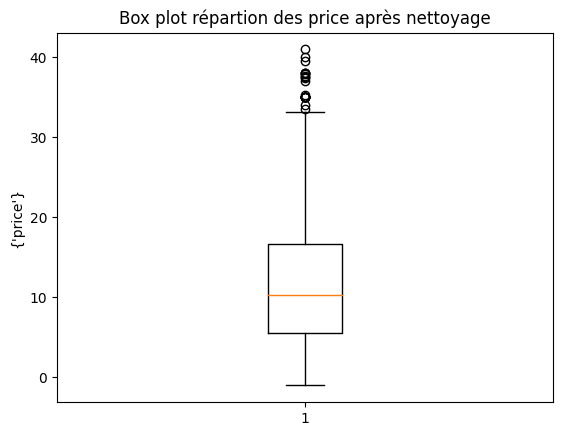

In [234]:
plt.boxplot(df_produit_vetement['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

### Category : accessoires

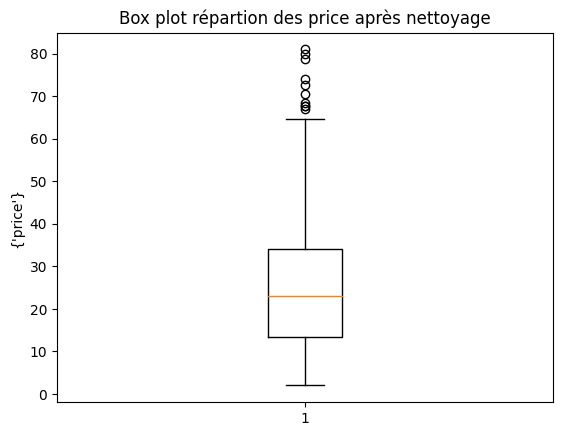

In [235]:
plt.boxplot(df_produit_accessoire['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

In [236]:
# Isolation Forest
clf = IsolationForest(contamination=0.001, random_state=42)
clf.fit(df_produit_accessoire[['price']])

df_produit_accessoire['anomaly_if'] = clf.predict(df_produit_accessoire[['price']])
print('='*50)
print("Les anomalies :")
print(df_produit_accessoire[df_produit_accessoire['anomaly_if'] == -1])

Les anomalies :
    product_id     category sub_category  price  stock_quantity  anomaly_if
824       1_13  Accessoires  Sacs à main  80.99              85          -1


/tmp/ipykernel_46621/676669672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_produit_accessoire['anomaly_if'] = clf.predict(df_produit_accessoire[['price']])


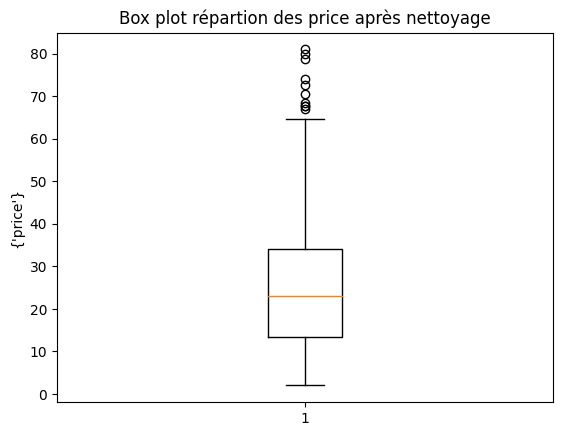

In [237]:
plt.boxplot(df_produit_accessoire['price'])

plt.title(f"Box plot répartion des {'price'} après nettoyage")
plt.ylabel("{'price'}")

plt.show()

In [238]:
df_produit.drop(columns='anomaly_if', inplace=True)

# Ventes

In [239]:
df_ventes = pd.read_csv('data/ventes.csv', sep=',')
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id_prod        337016 non-null  object
 1   date           337016 non-null  object
 2   session_id     337016 non-null  object
 3   client_id      337016 non-null  object
 4   quantity_sold  337016 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 12.9+ MB


In [240]:
df_ventes.head()

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2


In [241]:
df_ventes.drop_duplicates(subset=['id_prod','client_id','date','session_id'], keep='first', inplace=True)

In [242]:
# Pour chaque valeur de date, si elle commence par test_, on la remplace par la meme valeur à partir de la 5ème position
df_ventes['date'] = df_ventes['date'].apply(lambda x: x[5:] if x.startswith('test_') else x)

In [243]:
# Convertir la colonne 'date' en datetime
df_ventes['date'] = pd.to_datetime(df_ventes['date'])
df_ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336890 entries, 0 to 337015
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   id_prod        336890 non-null  object        
 1   date           336890 non-null  datetime64[ns]
 2   session_id     336890 non-null  object        
 3   client_id      336890 non-null  object        
 4   quantity_sold  336890 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 15.4+ MB


Histogramme avant nettoyage


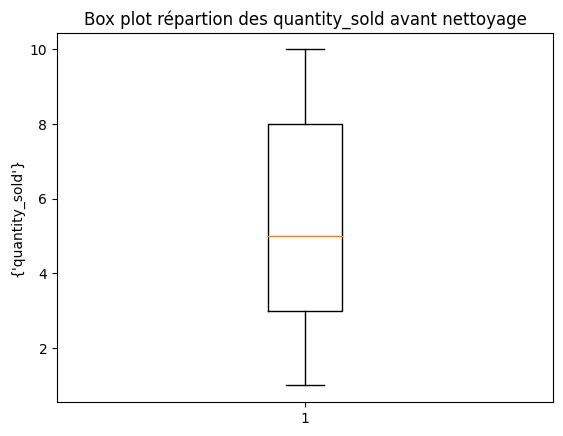

Les anomalies :
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, quantity_sold, anomaly_if]
Index: []


In [244]:
print('='*50)
print('Histogramme avant nettoyage')
plt.boxplot(df_ventes['quantity_sold'])

plt.title(f"Box plot répartion des {'quantity_sold'} avant nettoyage")
plt.ylabel("{'quantity_sold'}")

plt.show()


# Isolation Forest
clf = IsolationForest(contamination=0.0001, random_state=42)
clf.fit(df_ventes[['quantity_sold']])

df_ventes['anomaly_if'] = clf.predict(df_ventes[['quantity_sold']])
print('='*50)
print("Les anomalies :")
print(df_ventes[df_ventes['anomaly_if'] == -1])

In [245]:
# Drop colonne 'anomaly_if'
df_ventes.drop(columns='anomaly_if', inplace=True)

# Jointure

In [246]:
df_ventes.head()

,id_prod,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2


In [247]:
df_produit.head()

,product_id,category,sub_category,price,stock_quantity
0,0_1421,Vêtements,T-shirts,19.99,39
1,0_1368,Vêtements,T-shirts,5.13,76
2,0_731,Vêtements,T-shirts,17.99,2
3,1_587,Accessoires,Sacs à main,4.99,55
4,0_1507,Vêtements,T-shirts,3.99,81


In [248]:
df_client.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


#### Je commmence par produits pour conserver tous les produits et supprimer les produits qui pourraient etre vendu mais n'existe pas dans la table produit

In [249]:
df_ventes.rename(columns={'id_prod':'product_id'}, inplace=True)

In [250]:
df_ventes.head()

,product_id,date,session_id,client_id,quantity_sold
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,5
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,6
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,3
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,8
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,2


In [253]:
df_produit_ventes = pd.merge(df_produit, df_ventes, on='product_id', how='left')

In [254]:
df_produit_ventes.head()

,product_id,category,sub_category,price,stock_quantity,date,session_id,client_id,quantity_sold
0,0_1421,Vêtements,T-shirts,19.99,39,2021-05-12 23:26:29.885083,s_33709,c_7954,8.0
1,0_1421,Vêtements,T-shirts,19.99,39,2022-01-25 11:27:39.357012,s_154957,c_254,1.0
2,0_1421,Vêtements,T-shirts,19.99,39,2022-01-02 22:29:33.796003,s_144068,c_5770,7.0
3,0_1421,Vêtements,T-shirts,19.99,39,2021-03-05 17:10:40.265676,s_2187,c_1455,1.0
4,0_1421,Vêtements,T-shirts,19.99,39,2021-03-29 13:55:04.422637,s_13112,c_2768,8.0


In [255]:
df = pd.merge(df_produit_ventes, df_client, on='client_id', how='left')
df.head()

,product_id,category,sub_category,price,stock_quantity,date,session_id,client_id,quantity_sold,sex,birth
0,0_1421,Vêtements,T-shirts,19.99,39,2021-05-12 23:26:29.885083,s_33709,c_7954,8.0,m,1973.0
1,0_1421,Vêtements,T-shirts,19.99,39,2022-01-25 11:27:39.357012,s_154957,c_254,1.0,f,1990.0
2,0_1421,Vêtements,T-shirts,19.99,39,2022-01-02 22:29:33.796003,s_144068,c_5770,7.0,f,1977.0
3,0_1421,Vêtements,T-shirts,19.99,39,2021-03-05 17:10:40.265676,s_2187,c_1455,1.0,f,1932.0
4,0_1421,Vêtements,T-shirts,19.99,39,2021-03-29 13:55:04.422637,s_13112,c_2768,8.0,f,1989.0


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336809 entries, 0 to 336808
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   product_id      336809 non-null  object        
 1   category        336809 non-null  object        
 2   sub_category    336809 non-null  object        
 3   price           336809 non-null  float64       
 4   stock_quantity  336809 non-null  int64         
 5   date            336787 non-null  datetime64[ns]
 6   session_id      336787 non-null  object        
 7   client_id       336787 non-null  object        
 8   quantity_sold   336787 non-null  float64       
 9   sex             336750 non-null  object        
 10  birth           336750 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 30.8+ MB


In [258]:
df.isnull().sum()

product_id         0
category           0
sub_category       0
price              0
stock_quantity     0
date              22
session_id        22
client_id         22
quantity_sold     22
sex               59
birth             59
dtype: int64